# This is the loan prediction problem from the site analytics vidha.
In this problem we have to find that the loan is approved or not giving various features.
Steps required:
1.Importing Libaries and Data
2.Univariate Analysis
3.Bivariate Analysis
4.Handling missing values
5.Handling outliers
6.Model training
7.Final Submissions

In [24]:
#Importing libaries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
#Importing Data
data=pd.read_csv('/home/arpit/Downloads/DataSets/train_ctrUa4K.csv')
test=pd.read_csv('/home/arpit/Downloads/DataSets/test_lAUu6dG.csv')


In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [26]:
data_full=data.copy()
test_full=test.copy()

In [7]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
data.shape

(614, 13)

In [11]:
test.shape

(367, 12)

In [12]:
'''In this section, we will do univariate analysis. It is the simplest form of analyzing data
where we examine each variable individually. For categorical features we can use frequency
table or bar plots which will calculate the number of each category in a particular
variable. For numerical features, probability density plots can be used to look at 
the distribution of the variable.'''
#We will do this Reverse feature engineering after making one prediction also but here we do first

'In this section, we will do univariate analysis. It is the simplest form of analyzing data\nwhere we examine each variable individually. For categorical features we can use frequency\ntable or bar plots which will calculate the number of each category in a particular\nvariable. For numerical features, probability density plots can be used to look at \nthe distribution of the variable.'

In [14]:
#Handling Categorical Data
data['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [16]:
# Normalize can be set to True to print proportions instead of number 
data['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

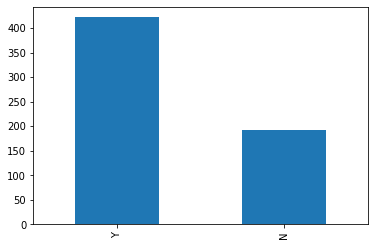

In [18]:
data['Loan_Status'].value_counts().plot.bar()

In [20]:
#Handling each feature seperatly
#Categorical features: These features have categories (Gender, Married, Self_Employed,
#Credit_History, Loan_Status)
#Ordinal features: Variables in categorical features having some order involved
#(Dependents, Education, Property_Area)
#Numerical features: These features have numerical values (ApplicantIncome, 
#CoapplicantIncome, LoanAmount, Loan_Amount_Term)

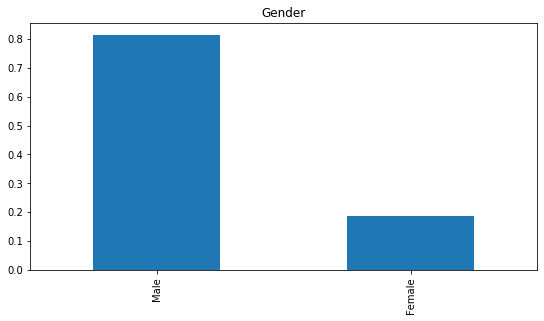

In [23]:
#Visualization of Categorical Variables
plt.figure(1) 
plt.subplot(221) 
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10), title= 'Gender') 

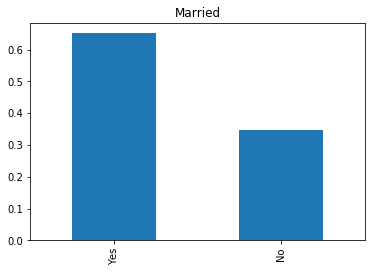

In [29]:
data['Married'].value_counts(normalize=True).plot.bar(title='Married')

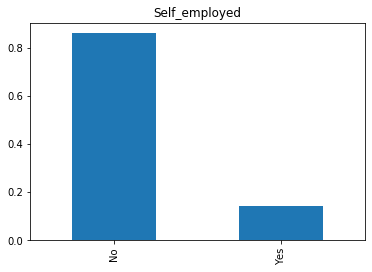

In [30]:
data['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_employed')

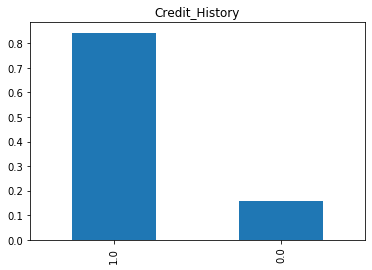

In [31]:
data['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')

In [32]:
#Data inferred from these plots
#80% applicants in the dataset are male.
#Around 65% of the applicants in the dataset are married.
#Around 15% applicants in the dataset are self employed.
#Around 85% applicants have repaid their debts.

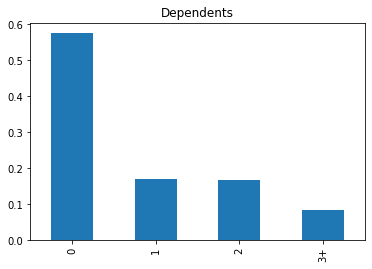

In [33]:
#Handling Ordinal Variables
data['Dependents'].value_counts(normalize=True).plot.bar(title='Dependents')

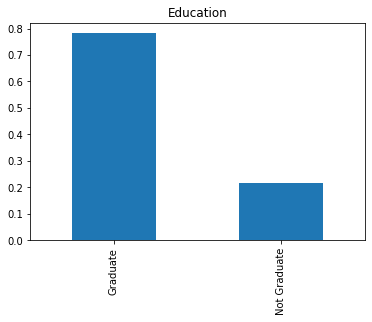

In [34]:
data['Education'].value_counts(normalize=True).plot.bar(title='Education')

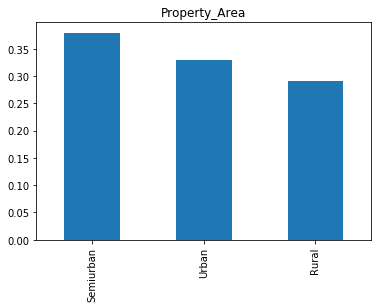

In [35]:
data['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')

In [36]:
#Data inferred from ordinal variables
#Most of the applicants don’t have any dependents.
#Around 80% of the applicants are Graduate.
#Most of the applicants are from Semiurban area.

In [37]:
#Handling Numerical Columns

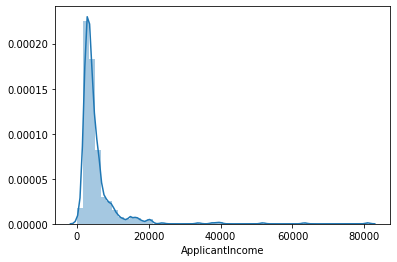

In [38]:
sns.distplot(data['ApplicantIncome'])

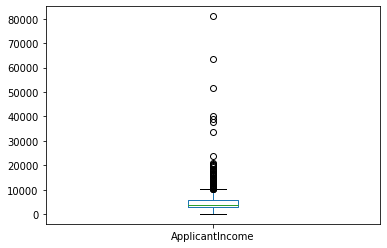

In [41]:
data['ApplicantIncome'].plot.box() 

In [42]:
#Data Inferred

In [43]:
'''
It can be inferred that most of the data in the distribution of applicant income is towards
left which means it is not normally distributed. We will try to make it normal in later
sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. 
This can be attributed to the income disparity in the society. Part of this can 
be driven by the fact that we are looking at people with different education levels.
Let us segregate them by Education:

'''

'\nIt can be inferred that most of the data in the distribution of applicant income is towards\nleft which means it is not normally distributed. We will try to make it normal in later\nsections as algorithms works better if the data is normally distributed.\n\nThe boxplot confirms the presence of a lot of outliers/extreme values. \nThis can be attributed to the income disparity in the society. Part of this can \nbe driven by the fact that we are looking at people with different education levels.\nLet us segregate them by Education:\n\n'

Text(0.5, 0.98, '')

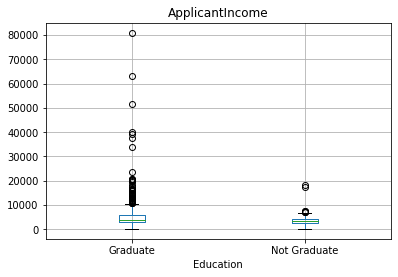

In [44]:
data.boxplot(column='ApplicantIncome', by = 'Education')
plt.suptitle("")

In [45]:
#We can see that there are a higher number of graduates with very high incomes,
#which are appearing to be the outliers.

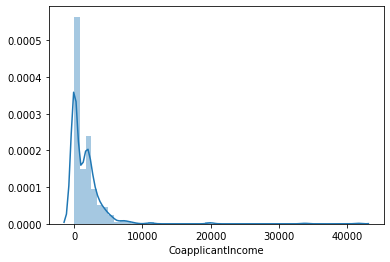

In [46]:
sns.distplot(data['CoapplicantIncome']); 

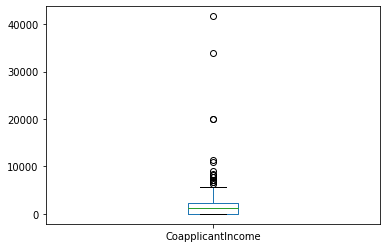

In [47]:
data['CoapplicantIncome'].plot.box()

In [48]:
'''We see a similar distribution as that of the applicant income. 
Majority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers
in the coapplicant income and it is not normally distributed.

Let’s look at the distribution of LoanAmount variable.'''

'We see a similar distribution as that of the applicant income. \nMajority of coapplicant’s income ranges from 0 to 5000. We also see a lot of outliers\nin the coapplicant income and it is not normally distributed.\n\nLet’s look at the distribution of LoanAmount variable.'

In [27]:
df=data.dropna()

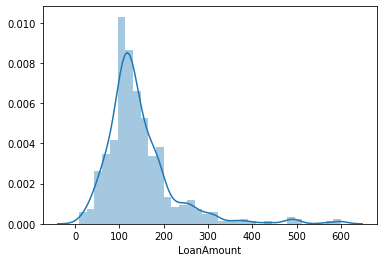

In [51]:
sns.distplot(df['LoanAmount'])

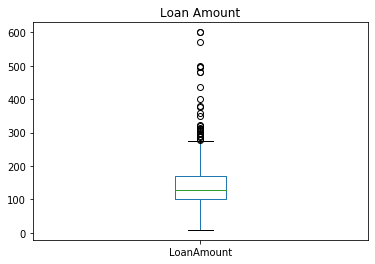

In [52]:
df['LoanAmount'].plot.box(title='Loan Amount')

In [53]:
'''
We see a lot of outliers in this variable and the distribution is fairly normal.
We will treat the outliers in later sections.

Now we would like to know how well each feature correlate with Loan Status.
So, in the next section we will look at bivariate analysis.

'''

'\nWe see a lot of outliers in this variable and the distribution is fairly normal.\nWe will treat the outliers in later sections.\n\nNow we would like to know how well each feature correlate with Loan Status.\nSo, in the next section we will look at bivariate analysis.\n\n'

In [55]:
'''
Lets recall some of the hypotheses that we generated earlier:

1.Applicants with high income should have more chances of loan approval.

2.Applicants who have repaid their previous debts should have higher chances of loan approval.

3.Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

4.Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.



'''

'\nLets recall some of the hypotheses that we generated earlier:\n\n1.Applicants with high income should have more chances of loan approval.\n\n2.Applicants who have repaid their previous debts should have higher chances of loan approval.\n\n3.Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.\n\n4.Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.\n\n\n\n'

In [56]:
'''
Lets try to test the above mentioned hypotheses using bivariate analysis

After looking at every variable individually in univariate analysis,
we will now explore them again with respect to the target variable.




'''

'\nLets try to test the above mentioned hypotheses using bivariate analysis\n\nAfter looking at every variable individually in univariate analysis,\nwe will now explore them again with respect to the target variable.\n\n\n\n\n'

In [57]:
#First of all we will find the relation between target variable and categorical independent
 #variables. Let us look at the stacked bar plot now which will give us the proportion 
    #of approved and unapproved loans.

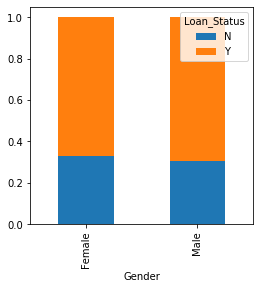

In [59]:
Gender=pd.crosstab(data['Gender'],data['Loan_Status'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

In [60]:
#It can be inferred that the proportion of male and female applicants is more or less same
 #for both approved and unapproved loans.

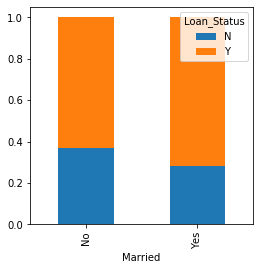

In [62]:
Married=pd.crosstab(data['Married'],data['Loan_Status'])
Dependents=pd.crosstab(data['Dependents'],data['Loan_Status'])
Education=pd.crosstab(data['Education'],data['Loan_Status'])
Self_Employed=pd.crosstab(data['Self_Employed'],data['Loan_Status'])
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 

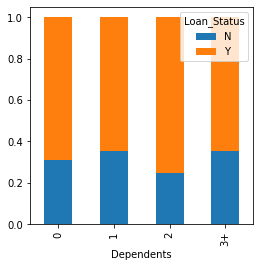

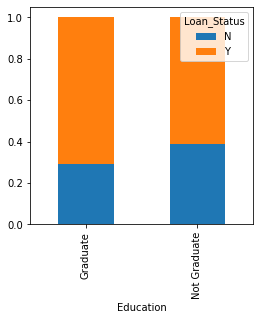

In [64]:
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
plt.show()

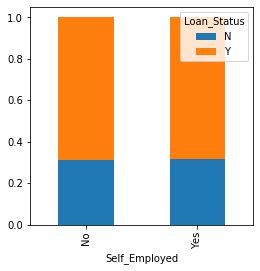

In [65]:
Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

In [66]:
#data inferred
#Proportion of married applicants is higher for the approved loans.
#Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.
#There is nothing significant we can infer from Self_Employed vs Loan_Status plot.

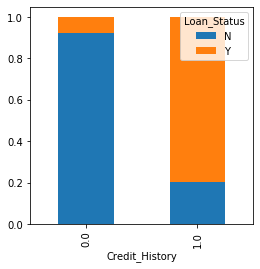

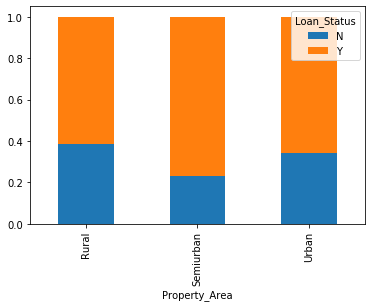

In [67]:
Credit_History=pd.crosstab(data['Credit_History'],data['Loan_Status']) 
Property_Area=pd.crosstab(data['Property_Area'],data['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

In [68]:
#It seems people with credit history as 1 are more likely to get their loans approved.
#Proportion of loans getting approved in semiurban area is higher as compared to that in
#rural or urban areas.

In [69]:
#Relation of target variables with Numerical Variables

In [70]:
'''We will try to find the mean income of people for which the loan has been approved 
vs the mean income of people for which the loan has not been approved.'''

'We will try to find the mean income of people for which the loan has been approved \nvs the mean income of people for which the loan has not been approved.'

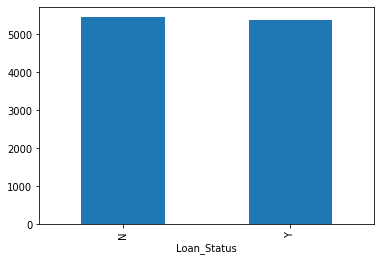

In [71]:
data.groupby('Loan_Status')['ApplicantIncome'].mean().plot.bar()

In [72]:
'''
Here the y-axis represents the mean applicant income. We don’t see any change in the mean
income. So, let’s make bins for the applicant income variable based on the values
in it and analyze the corresponding loan status for each bin.
'''

'\nHere the y-axis represents the mean applicant income. We don’t see any change in the mean\nincome. So, let’s make bins for the applicant income variable based on the values\nin it and analyze the corresponding loan status for each bin.\n'

In [73]:
bins=[0,2500,4000,6000,81000] 
group=['Low','Average','High', 'Very high']
data['Income_bin']=pd.cut(data['ApplicantIncome'],bins,labels=group)


In [74]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,High
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,High
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,High


Text(0, 0.5, 'Percentage')

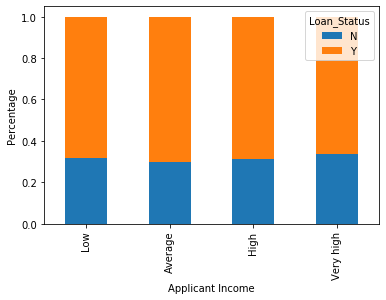

In [75]:
Income_bin=pd.crosstab(data['Income_bin'],data['Loan_Status'])
Income_bin.div(Income_bin.sum(1).astype(float),axis=0).plot(kind='bar',stacked=True)
plt.xlabel('Applicant Income')
plt.ylabel('Percentage')

In [76]:
'''
It can be inferred that Applicant income does not affect the chances of loan approval 
which contradicts our hypothesis in which we assumed that if the applicant income is high
the chances of loan approval will also be high.
'''

'\nIt can be inferred that Applicant income does not affect the chances of loan approval \nwhich contradicts our hypothesis in which we assumed that if the applicant income is high\nthe chances of loan approval will also be high.\n'

Text(0, 0.5, 'Percentage')

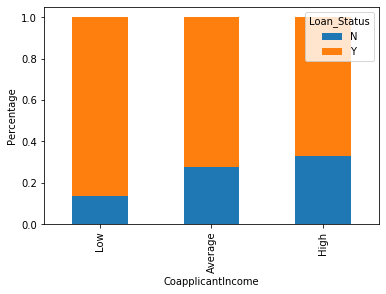

In [78]:
bins=[0,1000,3000,42000]
group=['Low','Average','High'] 
data['Coapplicant_Income_bin']=pd.cut(data['CoapplicantIncome'],bins,labels=group)
Coapplicant_Income_bin=pd.crosstab(data['Coapplicant_Income_bin'],data['Loan_Status']) 
Coapplicant_Income_bin.div(Coapplicant_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('CoapplicantIncome')
plt.ylabel('Percentage')

In [79]:
'''
It shows that if coapplicant’s income is less the chances of loan approval are high.
But this does not look right. The possible reason behind this may be that most of 
the applicants don’t have any coapplicant so the coapplicant income for such applicants
is 0 and hence the loan approval is not dependent on it. 
So we can make a new variable in which we will combine the applicant’s and 
coapplicant’s income to visualize the combined effect of income on loan approval.

'''

'\nIt shows that if coapplicant’s income is less the chances of loan approval are high.\nBut this does not look right. The possible reason behind this may be that most of \nthe applicants don’t have any coapplicant so the coapplicant income for such applicants\nis 0 and hence the loan approval is not dependent on it. \nSo we can make a new variable in which we will combine the applicant’s and \ncoapplicant’s income to visualize the combined effect of income on loan approval.\n\n'

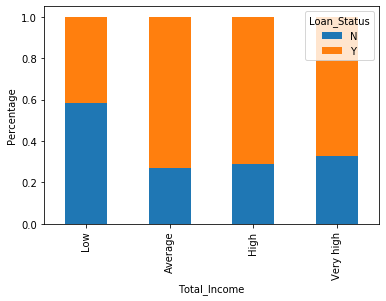

In [80]:
data['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome']
bins=[0,2500,4000,6000,81000]
group=['Low','Average','High', 'Very high'] 
data['Total_Income_bin']=pd.cut(data['Total_Income'],bins,labels=group)
Total_Income_bin=pd.crosstab(data['Total_Income_bin'],data['Loan_Status']) 
Total_Income_bin.div(Total_Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.xlabel('Total_Income') 
P = plt.ylabel('Percentage')

In [81]:
'''
We can see that Proportion of loans getting approved for applicants having
low Total_Income is very less as compared to that of applicants with Average, 
High and Very High Income.
'''

'\nWe can see that Proportion of loans getting approved for applicants having\nlow Total_Income is very less as compared to that of applicants with Average, \nHigh and Very High Income.\n'

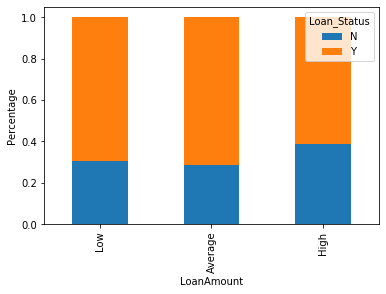

In [82]:
bins=[0,100,200,700]
group=['Low','Average','High']
data['LoanAmount_bin']=pd.cut(data['LoanAmount'],bins,labels=group)

LoanAmount_bin=pd.crosstab(data['LoanAmount_bin'],data['Loan_Status']) 
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True)
plt.xlabel('LoanAmount')
P = plt.ylabel('Percentage')

In [83]:
'''
It can be seen that the proportion of approved loans is higher for Low and Average
Loan Amount as compared to that of High Loan Amount which supports our hypothesis 
in which we considered that the chances of loan approval will be high when the loan 
amount is less.
'''

'\nIt can be seen that the proportion of approved loans is higher for Low and Average\nLoan Amount as compared to that of High Loan Amount which supports our hypothesis \nin which we considered that the chances of loan approval will be high when the loan \namount is less.\n'

In [84]:
'''Let’s drop the bins which we created for the exploration part. 
We will change the 3+ in dependents variable to 3 to make it a numerical variable.
We will also convert the target variable’s categories into 0 and 1 
so that we can find its correlation with numerical variables. 
One more reason to do so is few models like logistic regression takes only
numeric values as input. We will replace N with 0 and Y with 1.
'''

'Let’s drop the bins which we created for the exploration part. \nWe will change the 3+ in dependents variable to 3 to make it a numerical variable.\nWe will also convert the target variable’s categories into 0 and 1 \nso that we can find its correlation with numerical variables. \nOne more reason to do so is few models like logistic regression takes only\nnumeric values as input. We will replace N with 0 and Y with 1.\n'

In [85]:
data=data.drop(['Income_bin', 'Coapplicant_Income_bin', 'LoanAmount_bin', 'Total_Income_bin', 'Total_Income'], axis=1)

In [28]:
data['Dependents'].replace('3+', 3,inplace=True)
test['Dependents'].replace('3+', 3,inplace=True)
data['Loan_Status'].replace('N', 0,inplace=True) 
data['Loan_Status'].replace('Y', 1,inplace=True)

In [88]:
'''
Now lets look at the correlation between all the numerical variables.
We will use the heat map to visualize the correlation. 
Heatmaps visualize data through variations in coloring. 
The variables with darker color means their correlation is more.
'''

'\nNow lets look at the correlation between all the numerical variables.\nWe will use the heat map to visualize the correlation. \nHeatmaps visualize data through variations in coloring. \nThe variables with darker color means their correlation is more.\n'

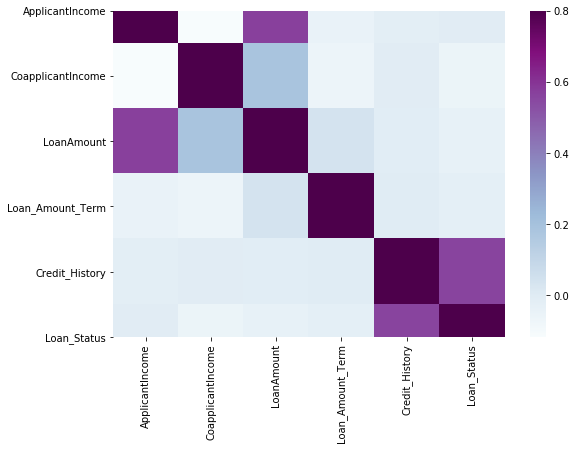

In [6]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(9, 6)) 
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

In [90]:
'''
We see that the most correlated variables are (ApplicantIncome - LoanAmount)
and (Credit_History - Loan_Status). 
LoanAmount is also correlated with CoapplicantIncome.
'''

'\nWe see that the most correlated variables are (ApplicantIncome - LoanAmount)\nand (Credit_History - Loan_Status). \nLoanAmount is also correlated with CoapplicantIncome.\n'

In [ ]:
#Handling missing values and outliners
'''
After exploring all the variables in our data, we can now impute the missing values 
and treat the outliers because missing data and outliers can have adverse effect 
on the model performance.
'''

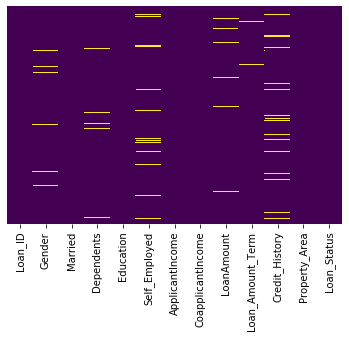

In [94]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [95]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [96]:
#techniques used to fill missing values
#For numerical variables: imputation using mean or median
#For categorical variables: imputation using mode

In [29]:
#There are very less missing values in Gender, Married, Dependents, Credit_History and Self_Employed 
#features so we can fill them using the mode of the features.

data['Gender'].fillna(data['Gender'].mode()[0], inplace=True)
data['Married'].fillna(data['Married'].mode()[0], inplace=True)
data['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True)
data['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True) 
data['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True)

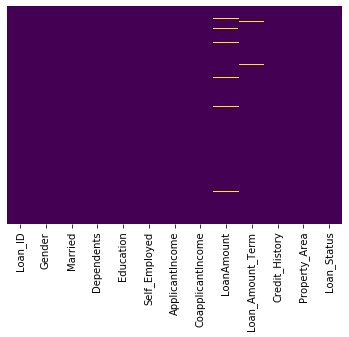

In [98]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [99]:
data['Loan_Amount_Term'].value_counts()


360.0    512
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [30]:
data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0],inplace=True)
'''
It can be seen that in loan amount term variable, the value of 360 is repeating the most.
So we will replace the missing values in this variable using the mode of this variable.
'''

'\nIt can be seen that in loan amount term variable, the value of 360 is repeating the most.\nSo we will replace the missing values in this variable using the mode of this variable.\n'

In [32]:
'''
Now we will see the LoanAmount variable. As it is a numerical variable, 
we can use mean or median to impute the missing values. We will use median to fill 
the null values as earlier we saw that loan amount have outliers so the mean will
not be the proper approach as it is highly affected by the presence of outliers.
'''
data['LoanAmount'].fillna(data['LoanAmount'].median(),inplace=True)

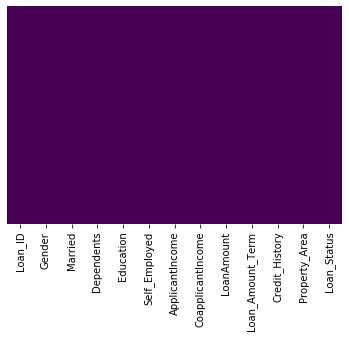

In [33]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [34]:
#HANDLE MISSING VALUE IN THE TEST DATA TOO
test['Gender'].fillna(data['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(data['Dependents'].mode()[0], inplace=True) 
test['Self_Employed'].fillna(data['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(data['Credit_History'].mode()[0], inplace=True) 
test['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mode()[0], inplace=True) 
test['LoanAmount'].fillna(data['LoanAmount'].median(), inplace=True)

In [104]:
'''
As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat
them as the presence of outliers affects the distribution of the data. Let's examine what 
can happen to a data set with outliers. For the sample data set:

1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4

We find the following: mean, median, mode, and standard deviation

Mean = 2.58

Median = 2.5

Mode = 2

Standard Deviation = 1.08

If we add an outlier to the data set:

1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 400

The new values of our statistics are:

Mean = 35.38

Median = 2.5

Mode = 2

Standard Deviation = 114.74

It can be seen that having outliers often has a significant effect on the mean and
standard deviation and hence affecting the distribution. We must take steps to remove 
outliers from our data sets.
'''

"\nAs we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat\nthem as the presence of outliers affects the distribution of the data. Let's examine what \ncan happen to a data set with outliers. For the sample data set:\n\n1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4\n\nWe find the following: mean, median, mode, and standard deviation\n\nMean = 2.58\n\nMedian = 2.5\n\nMode = 2\n\nStandard Deviation = 1.08\n\nIf we add an outlier to the data set:\n\n1, 1, 2, 2, 2, 2, 3, 3, 3, 4, 4, 400\n\nThe new values of our statistics are:\n\nMean = 35.38\n\nMedian = 2.5\n\nMode = 2\n\nStandard Deviation = 114.74\n\nIt can be seen that having outliers often has a significant effect on the mean and\nstandard deviation and hence affecting the distribution. We must take steps to remove \noutliers from our data sets.\n"

In [105]:
'''
Due to these outliers bulk of the data in the loan amount is at the left and the right
tail is longer. This is called right skewness. One way to remove the skewness is by doing
the log transformation. As we take the log transformation, it does not affect the
smaller values much, but reduces the larger values. So, we get a distribution similar
to normal distribution.

Let’s visualize the effect of log transformation. We will do the similar changes
to the test file simultaneously.

'''

'\nDue to these outliers bulk of the data in the loan amount is at the left and the right\ntail is longer. This is called right skewness. One way to remove the skewness is by doing\nthe log transformation. As we take the log transformation, it does not affect the\nsmaller values much, but reduces the larger values. So, we get a distribution similar\nto normal distribution.\n\nLet’s visualize the effect of log transformation. We will do the similar changes\nto the test file simultaneously.\n\n'

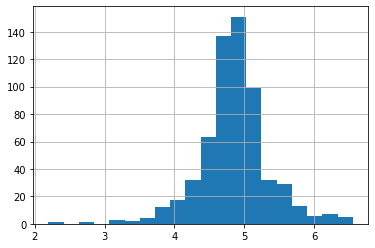

In [35]:
data['LoanAmount_log'] = np.log(data['LoanAmount']) 
data['LoanAmount_log'].hist(bins=20) 
test['LoanAmount_log'] = np.log(test['LoanAmount'])

In [108]:
'''
Now the distribution looks much closer to normal and effect of extreme values
has been significantly subsided. Let’s build a logistic regression model and 
make predictions for the test dataset.
'''

'\nNow the distribution looks much closer to normal and effect of extreme values\nhas been significantly subsided. Let’s build a logistic regression model and \nmake predictions for the test dataset.\n'

In [11]:
'''
Precision: It is a measure of correctness achieved in true prediction i.e. of observations 
labeled as true, how many are actually labeled true.
Precision = TP / (TP + FP)

Recall(Sensitivity) - It is a measure of actual observations which are predicted correctly
i.e. how many observations of true class are labeled correctly. It is also known as 
‘Sensitivity’.
Recall = TP / (TP + FN)

Specificity - It is a measure of how many observations of false class are labeled correctly.
Specificity = TN / (TN + FP)

'''

'\nPrecision: It is a measure of correctness achieved in true prediction i.e. of observations \nlabeled as true, how many are actually labeled true.\nPrecision = TP / (TP + FP)\n\nRecall(Sensitivity) - It is a measure of actual observations which are predicted correctly\ni.e. how many observations of true class are labeled correctly. It is also known as \n‘Sensitivity’.\nRecall = TP / (TP + FN)\n\nSpecificity - It is a measure of how many observations of false class are labeled correctly.\nSpecificity = TN / (TN + FP)\n\n'

In [12]:
#Model Building

In [36]:
data=data.drop('Loan_ID',axis=1)
test=test.drop('Loan_ID',axis=1)

In [37]:
X=data.drop('Loan_Status',axis=1)
Y=data['Loan_Status']

In [38]:
X=pd.get_dummies(X) 
data1=pd.get_dummies(data) 
test1=pd.get_dummies(test)

In [39]:
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,Y, test_size =0.3)

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [42]:
model=LogisticRegression()


In [43]:
model.fit(x_train,y_train)

/home/arpit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [44]:
pred_cv=model.predict(x_cv)

In [45]:
accuracy_score(y_cv,pred_cv)

0.8054054054054054

In [46]:
pred_test=model.predict(test1)

In [47]:
#Submissions

submission=pd.read_csv("Sample_Submission_ZAuTl8O_FK3zQHh.csv")
We only need the Loan_ID and the corresponding Loan_Status for the final submission.
we will fill these columns with the Loan_ID of test dataset and the predictions that
we made, i.e., pred_test respectively.

submission['Loan_Status']=pred_test 
submission['Loan_ID']=test_original['Loan_ID']
Remember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.

submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
Finally we will convert the submission to .csv format and make submission to check the 
accuracy on the leaderboard.

pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv')



'\nsubmission=pd.read_csv("Sample_Submission_ZAuTl8O_FK3zQHh.csv")\nWe only need the Loan_ID and the corresponding Loan_Status for the final submission.\nwe will fill these columns with the Loan_ID of test dataset and the predictions that\nwe made, i.e., pred_test respectively.\n\nsubmission[\'Loan_Status\']=pred_test \nsubmission[\'Loan_ID\']=test_original[\'Loan_ID\']\nRemember we need predictions in Y and N. So let’s convert 1 and 0 to Y and N.\n\nsubmission[\'Loan_Status\'].replace(0, \'N\',inplace=True) \nsubmission[\'Loan_Status\'].replace(1, \'Y\',inplace=True)\nFinally we will convert the submission to .csv format and make submission to check the \naccuracy on the leaderboard.\n\npd.DataFrame(submission, columns=[\'Loan_ID\',\'Loan_Status\']).to_csv(\'logistic.csv\')\n\n'

In [48]:
#Cross validation
from sklearn.model_selection import StratifiedKFold

In [55]:
i=1 
kf = StratifiedKFold(n_splits=5,random_state=1,shuffle=True) 
for data_index,test_index in kf.split(X,Y): 
    print('\n{} of kfold {}'.format(i,kf.n_splits)) 
    xtr,xvl = X.loc[data_index],X.loc[test_index]
    ytr,yvl = Y[data_index],Y[test_index]   
    model = LogisticRegression(random_state=1) 
    model.fit(xtr, ytr)
    pred_test = model.predict(xvl)
    score = accuracy_score(yvl,pred_test)
    print('accuracy_score',score)  
    i+=1 
    pred_test = model.predict(test1)
    pred=model.predict_proba(xvl)[:,1]


1 of kfold 5
accuracy_score 0.8064516129032258

2 of kfold 5
accuracy_score 0.8064516129032258

3 of kfold 5
accuracy_score 0.8114754098360656

4 of kfold 5
accuracy_score 0.7950819672131147

5 of kfold 5
accuracy_score 0.8360655737704918


/home/arpit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/arpit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/arpit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/arpit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/arpit/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 

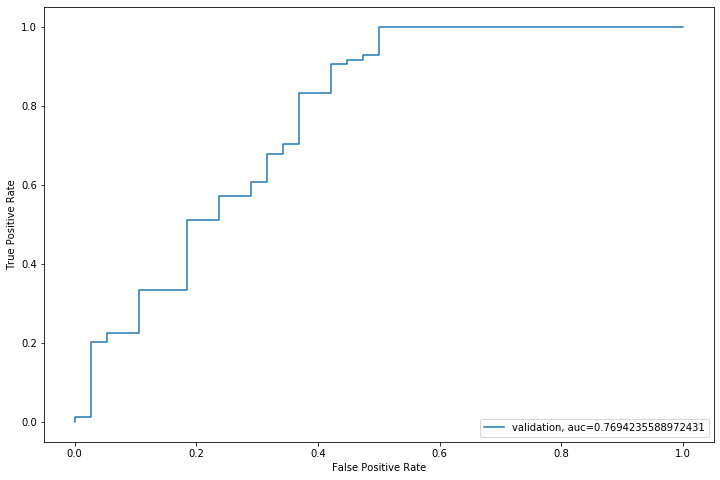

In [56]:
from sklearn import metrics
fpr, tpr, _ = metrics.roc_curve(yvl,  pred) 
auc = metrics.roc_auc_score(yvl, pred)
plt.figure(figsize=(12,8)) 
plt.plot(fpr,tpr,label="validation, auc="+str(auc)) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate')
plt.legend(loc=4)
plt.show()

In [57]:
#FEATURE ENGINEERING
'''
Based on the domain knowledge, we can come up with new features that might affect the 
target variable. We will create the following three new features:

Total Income - As discussed during bivariate analysis we will combine 
the Applicant Income and Coapplicant Income. If the total income is high, chances of 
loan approval might also be high.

EMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea
behind making this variable is that people who have high EMI’s might find it
difficult to pay back the loan. We can calculate the EMI by taking the ratio
of loan amount with respect to loan amount term.

Balance Income - This is the income left after the EMI has been paid.
Idea behind creating this variable is that if this value is high, the chances are high 
that a person will repay the loan and hence increasing the chances of loan approval.
'''

'\nBased on the domain knowledge, we can come up with new features that might affect the \ntarget variable. We will create the following three new features:\n\nTotal Income - As discussed during bivariate analysis we will combine \nthe Applicant Income and Coapplicant Income. If the total income is high, chances of \nloan approval might also be high.\n\nEMI - EMI is the monthly amount to be paid by the applicant to repay the loan. Idea\nbehind making this variable is that people who have high EMI’s might find it\ndifficult to pay back the loan. We can calculate the EMI by taking the ratio\nof loan amount with respect to loan amount term.\n\nBalance Income - This is the income left after the EMI has been paid.\nIdea behind creating this variable is that if this value is high, the chances are high \nthat a person will repay the loan and hence increasing the chances of loan approval.\n'

In [58]:
data1['Total_Income']=data['ApplicantIncome']+data['CoapplicantIncome'] 
test1['Total_Income']=test['ApplicantIncome']+test['CoapplicantIncome']

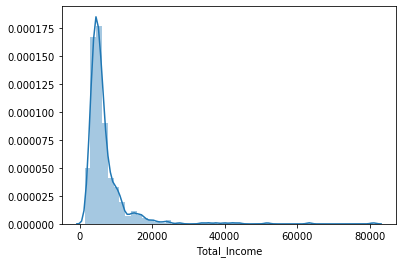

In [59]:
sns.distplot(data1['Total_Income']);

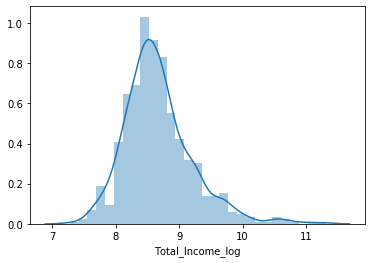

In [60]:
#For making it normally distributed
data1['Total_Income_log'] = np.log(data1['Total_Income'])
sns.distplot(data1['Total_Income_log']); 
test1['Total_Income_log'] = np.log(test1['Total_Income'])

In [61]:
data1['EMI']=data1['LoanAmount']/data1['Loan_Amount_Term'] 
test1['EMI']=test1['LoanAmount']/test1['Loan_Amount_Term']

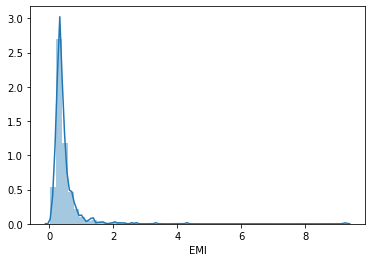

In [63]:
sns.distplot(data1['EMI']);


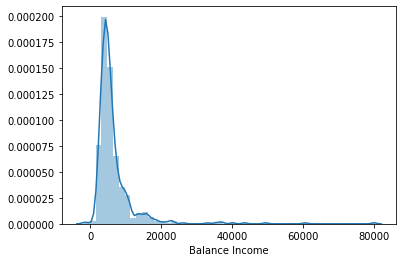

In [65]:
data1['Balance Income']=data1['Total_Income']-(data1['EMI']*1000)
# Multiply with 1000 to make the units equal
test1['Balance Income']=test1['Total_Income']-(test1['EMI']*1000)
sns.distplot(data1['Balance Income']);

In [66]:
'''Let us now drop the variables which we used to create these new features. 
Reason for doing this is, the correlation between those old features and these 
new features will be very high and logistic regression assumes that the variables 
are not highly correlated. We also wants to remove the noise from the dataset,
so removing correlated features will help in reducing the noise too.'''

data1=data1.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
test1=test1.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

In [67]:
'''
We will build the following models in this section.

Logistic Regression
Decision Tree
Random Forest
XGBoost
'''

'\nWe will build the following models in this section.\n\nLogistic Regression\nDecision Tree\nRandom Forest\nXGBoost\n'